# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline

Nous importons les modules nécessaires pour cette étude

In [2]:
import pandas as pd
import numpy as np
import datetime

On télécharge le fichier *weekly_in_situ_co2_mlo.csv* en local

In [3]:
df = pd.read_csv('weekly_in_situ_co2_mlo.csv', header=44, names=['week', 'concentration'])
# Ici header=44 permet de sauter les premières lignes du csv qui ne contiennent pas de données

On affiche le dataframe obtenu

In [4]:
print(df)

            week  concentration
0     1958-04-05         317.31
1     1958-04-12         317.69
2     1958-04-19         317.58
3     1958-04-26         316.48
4     1958-05-03         316.95
5     1958-05-17         317.56
6     1958-05-24         317.99
7     1958-07-05         315.85
8     1958-07-12         315.85
9     1958-07-19         315.46
10    1958-07-26         315.59
11    1958-08-02         315.64
12    1958-08-09         315.10
13    1958-08-16         315.09
14    1958-08-30         314.14
15    1958-09-06         313.54
16    1958-11-08         313.05
17    1958-11-15         313.26
18    1958-11-22         313.57
19    1958-11-29         314.01
20    1958-12-06         314.56
21    1958-12-13         314.41
22    1958-12-20         314.77
23    1958-12-27         315.21
24    1959-01-03         315.24
25    1959-01-10         315.50
26    1959-01-17         315.69
27    1959-01-24         315.86
28    1959-01-31         315.42
29    1959-02-14         316.94
...     

On vérifie qu'il y a bien des données pour toutes les lignes et colonnes : 

In [5]:
print(df.isnull())
print(df.isnull().any())

       week  concentration
0     False          False
1     False          False
2     False          False
3     False          False
4     False          False
5     False          False
6     False          False
7     False          False
8     False          False
9     False          False
10    False          False
11    False          False
12    False          False
13    False          False
14    False          False
15    False          False
16    False          False
17    False          False
18    False          False
19    False          False
20    False          False
21    False          False
22    False          False
23    False          False
24    False          False
25    False          False
26    False          False
27    False          False
28    False          False
29    False          False
...     ...            ...
3301  False          False
3302  False          False
3303  False          False
3304  False          False
3305  False          False
3

In [6]:
print(df.dtypes)

week              object
concentration    float64
dtype: object


La colonne "week" n'apparait pas au format date, donc on transforme le format de cette colonne

In [7]:
df['week'] = pd.to_datetime(df['week'])

In [8]:
print(df[:10])

        week  concentration
0 1958-04-05         317.31
1 1958-04-12         317.69
2 1958-04-19         317.58
3 1958-04-26         316.48
4 1958-05-03         316.95
5 1958-05-17         317.56
6 1958-05-24         317.99
7 1958-07-05         315.85
8 1958-07-12         315.85
9 1958-07-19         315.46


On vérifie maintenant que le nouveau format est bien un format date

In [9]:
print(df.dtypes)

week             datetime64[ns]
concentration           float64
dtype: object


On peut réaliser un premier affichage des données : 

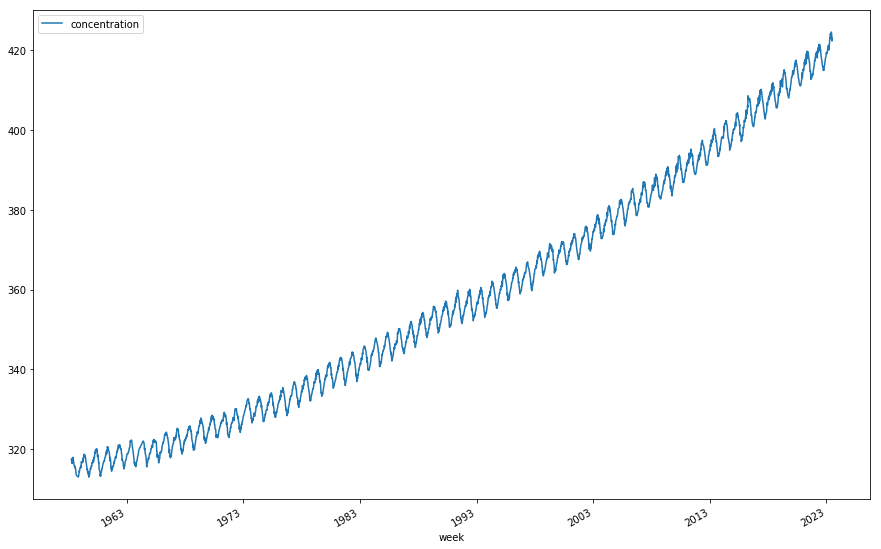

In [10]:
df.plot('week', 'concentration', figsize=(15,10))

Cet affichage fait apparaître un phénomène périodique en dents de scie couplé à une augmentation linéaire de la concentration en $CO_{2}$ dans le temps.


On se concentre sur une période de temps plus courte pour essayer de comprends le phénomène périodique

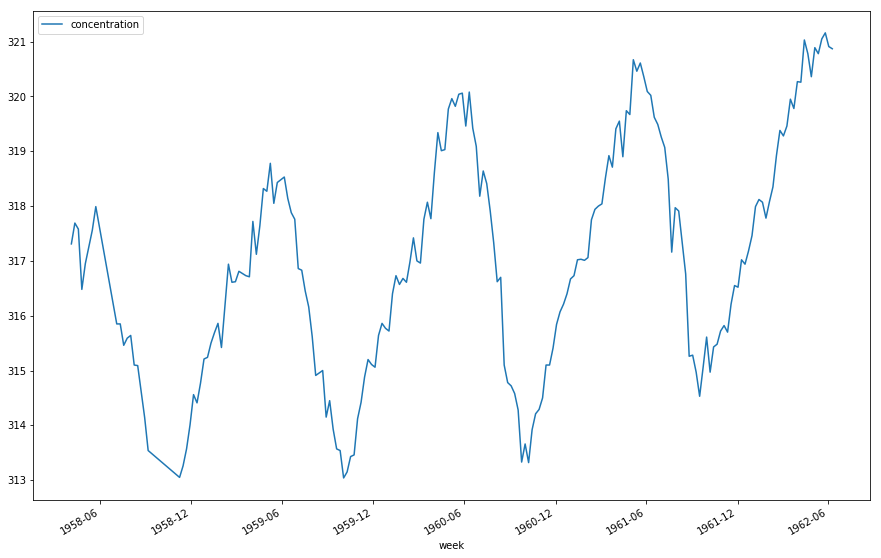

In [11]:
df[:200].plot('week', 'concentration', figsize=(15,10))

Il apparaît clairement que la période du motif périodique est de 1 an, avec un minimum en novembre et un maximum en juin.
Pour n'étudier que la tendance haussière et pas le motif périodique, on va ne garder qu'une seule date par an correspondant à la première semaine de novembre.

In [12]:
df['year'] = df['week'].apply(lambda x:x.year) # on ajoute une colonne "year" qui correspond à l'année de la date 
df['month'] = df['week'].apply(lambda x:x.month) # on ajoute une colonne "month" qui correspond au mois de la date
df_november = df[df["month"] == 11] # on ne conserve dans un premier temps que les dates de novembre
df_first_november = df_november.drop_duplicates(subset="year", keep='first') # on ne garde ensuite que la première semaine de novembre

On peut maintenat afficher les données réduites aux premières semaines de novembre

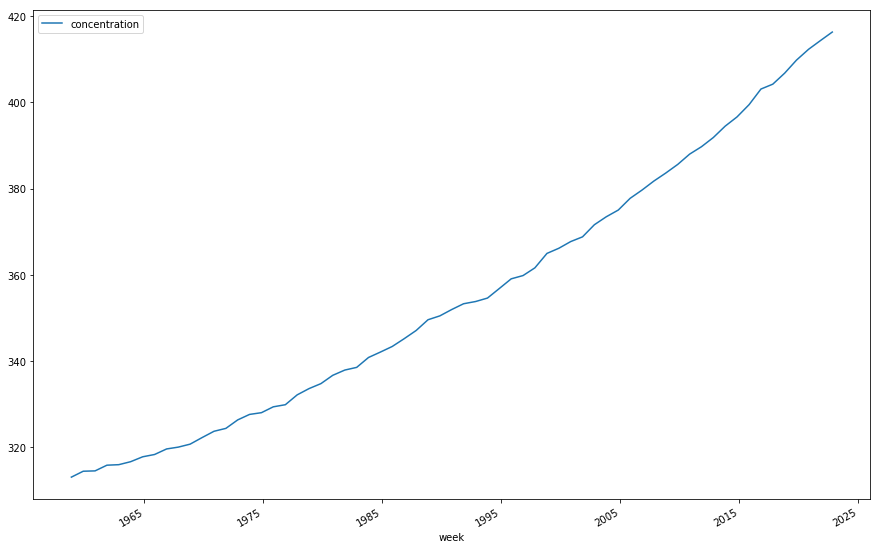

In [13]:
df_first_november.plot('week', 'concentration', figsize=(15,10))

Le motif périodique a clairement disparu. Il ne reste maintenant qu'une tendance haussière, qui peut être approximée par une droite dans un premier temps. On va chercher à estimer les coefficients de cette droite afin d'effectuer des prédictions pour des dates futures

In [14]:
print(df_first_november['concentration'])

16      313.05
64      314.42
116     314.50
168     315.82
217     315.94
266     316.63
297     317.77
349     318.30
398     319.59
447     320.01
499     320.70
551     322.21
604     323.69
656     324.36
708     326.33
760     327.60
812     328.00
864     329.36
916     329.85
968     332.14
1020    333.59
1072    334.74
1124    336.67
1177    337.89
1229    338.51
1281    340.81
1329    342.06
1380    343.36
1432    345.15
1485    347.07
         ...  
1798    354.59
1850    356.81
1902    359.05
1954    359.81
2006    361.60
2059    364.95
2111    366.14
2163    367.69
2215    368.79
2267    371.60
2316    373.44
2369    375.01
2417    377.73
2467    379.64
2518    381.73
2570    383.58
2623    385.60
2675    387.98
2727    389.70
2777    391.83
2829    394.47
2881    396.61
2934    399.46
2986    403.08
3038    404.21
3090    406.76
3142    409.79
3194    412.30
3246    414.32
3298    416.30
Name: concentration, Length: 65, dtype: float64


In [15]:
coef_reg = np.polyfit(np.arange(len(df_first_november['concentration'])), df_first_november['concentration'], 1) # on obtient les coefficients de la régression
print(coef_reg)
poly1d_fn = np.poly1d(coef_reg) # poly1d_fn est une fonction qui permet de faire une nouvelle prédiction avec les coefficients obtenus.

[  1.6126097  303.83802797]


In [16]:
df_filtered = df_first_november[['week', 'concentration']] # on ne conserve que les colonnes week et concentration

In [17]:
df_filtered[:5]

week  concentration
16  1958-11-08         313.05
64  1959-11-07         314.42
116 1960-11-05         314.50
168 1961-11-04         315.82
217 1962-11-03         315.94

On va maintenant effectuer les prédictions pour 3 dates futures : novembre 2023, 2024 et 2025

In [18]:
df_future = pd.DataFrame({'week':[datetime.datetime(2023, 11, 4), datetime.datetime(2024, 11, 2), datetime.datetime(2025, 11, 1)], 
                         "concentration":[None, None, None]})

In [19]:
df_future

concentration       week
0          None 2023-11-04
1          None 2024-11-02
2          None 2025-11-01

In [26]:
df_concat = pd.concat([df_filtered, df_future]) # on concatène les dates actuelles avec les dates futures

In [21]:
print(df_concat)

      concentration       week
16           313.05 1958-11-08
64           314.42 1959-11-07
116          314.50 1960-11-05
168          315.82 1961-11-04
217          315.94 1962-11-03
266          316.63 1963-11-02
297          317.77 1964-11-07
349          318.30 1965-11-06
398          319.59 1966-11-12
447          320.01 1967-11-04
499          320.70 1968-11-02
551          322.21 1969-11-01
604          323.69 1970-11-07
656          324.36 1971-11-06
708          326.33 1972-11-04
760          327.60 1973-11-03
812          328.00 1974-11-02
864          329.36 1975-11-01
916          329.85 1976-11-06
968          332.14 1977-11-05
1020         333.59 1978-11-04
1072         334.74 1979-11-03
1124         336.67 1980-11-01
1177         337.89 1981-11-07
1229         338.51 1982-11-06
1281         340.81 1983-11-05
1329         342.06 1984-11-03
1380         343.36 1985-11-02
1432         345.15 1986-11-01
1485         347.07 1987-11-07
...             ...        ...
1954    

In [22]:
df_concat["predictions"] = poly1d_fn(np.arange(len(df_concat))) # on effectue les prédictions pour toutes les dates

In [23]:
print(df_concat)

      concentration       week  predictions
16           313.05 1958-11-08   303.838028
64           314.42 1959-11-07   305.450638
116          314.50 1960-11-05   307.063247
168          315.82 1961-11-04   308.675857
217          315.94 1962-11-03   310.288467
266          316.63 1963-11-02   311.901076
297          317.77 1964-11-07   313.513686
349          318.30 1965-11-06   315.126296
398          319.59 1966-11-12   316.738906
447          320.01 1967-11-04   318.351515
499          320.70 1968-11-02   319.964125
551          322.21 1969-11-01   321.576735
604          323.69 1970-11-07   323.189344
656          324.36 1971-11-06   324.801954
708          326.33 1972-11-04   326.414564
760          327.60 1973-11-03   328.027174
812          328.00 1974-11-02   329.639783
864          329.36 1975-11-01   331.252393
916          329.85 1976-11-06   332.865003
968          332.14 1977-11-05   334.477612
1020         333.59 1978-11-04   336.090222
1072         334.74 1979-11-03  

On a maintenant tout ce qu'il faut pour afficher à la fois les vraies données et nos prédictions pour celles ci :

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


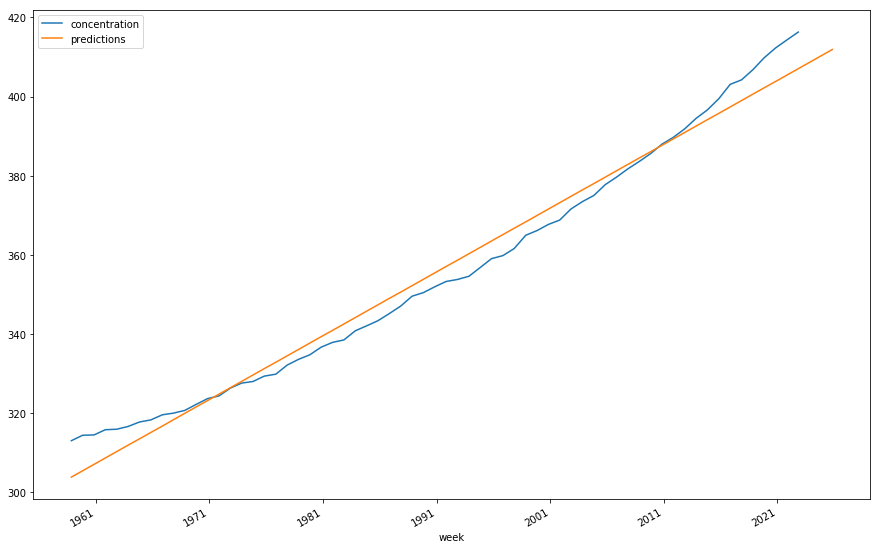

In [25]:
df_concat.plot(x="week", y=["concentration", "predictions"], figsize=(15,10))

On aperçoit que la droite colle assez bien à nos données. Néanmoins, elle sous-estime un peu pour les dates anciennes (années 1960)
et les dates récentes (à partir des années 2010). Ainsi, la prédiction pour novembre 2025 d'une concentration de **412 ppm** est sans doute une sous-estimation.
Pour y remédier, on pourrait n'effectuer la régression que sur les années récentes, par ex à partir des années 2000.
On aurait ainsi une estimation plus précise.